In [330]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
from scipy import optimize as opt


# Problem 1

In [60]:
def newtonroot(x0, f,fprime ,tol=1e-16, maxiter=1000):
    x=f(x0)+x0
    xnew=x0
    i=0
    while abs(xnew-x)>tol and i<maxiter:
        x=xnew
        xnew=x-f(x)/fprime(x)
        i+=1
    return xnew

In [61]:
f= lambda x: np.exp(x)-2
g= lambda x: x**4-3
newtonroot(1,f,lambda x: np.exp(x))-np.log(2), newtonroot(1,g, lambda x: 4*x**3)-3**(1/4)

(0.0, 0.0)

# Problem 2

In [64]:
def func(N1,N2,P1,P2):
    f=lambda r: P1*((1+r)**N1-1)-P2*(1-(1+r)**(-N2))
    fprime= lambda r: P1*N1*(1+r)**(N1-1)+P2*N2*(1+r)**(-N2-1)
    r=newtonroot(0.1,f,fprime)
    return r

In [65]:
func(30,20,2000,8000)

0.038778432029673994

# Problem 3

In [96]:
def backtrack(x0, f,fprime ,alpha=1,tol=1e-16, maxiter=1000):
    x=f(x0)+x0
    xnew=x0
    i=0
    while abs((xnew-x))>tol and i<maxiter:
        x=xnew
        xnew=x-alpha*(f(x)/fprime(x))
        i+=1
    return xnew, i

In [102]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1/3)
fprime=lambda x: (1/3)*np.sign(x) * np.power(np.abs(x), -2/3)
backtrack(0.01,f,fprime)[0], backtrack(0.01,f,fprime,0.3)[0]


/Users/hqdhftw/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/Users/hqdhftw/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


(-inf, 9.9999999999983999e-18)

# Problem 4

In [103]:
def backtrack_noalpha(x0, f,fprime,tol=1e-16, maxiter=1000):
    alpha=np.linspace(0,1,300)
    backtrack_vec=np.vectorize(backtrack)
    plt.plot(alpha, backtrack_vec(x0,f,fprime,alpha)[1])
    plt.xlabel('alpha')
    plt.ylabel('No. of iterations')
    return plt.show()

/Users/hqdhftw/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/Users/hqdhftw/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


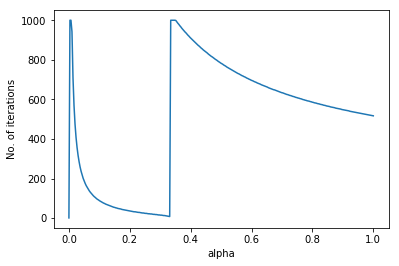

In [104]:
backtrack_noalpha(0.01,f,fprime)

# Problem 5

In [146]:
def jacobian(f, x, h):
    n=len(x)
    m=len(f(x))
    J=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            e=np.zeros(n)
            e[j]=1
            J[i,j]=(f(x+h*e)[i]-f(x-h*e)[i])/(2*h)
    return J

In [210]:
def newtonroot_multi(x0, f,alpha=1, h=1e-6, tol=1e-16, maxiter=1000):
    if np.isscalar(f(x0))==True:
        fprime=lambda x: (f(x+h)-f(x-h))/(2*h)
        return backtrack(x0,f,fprime, alpha)
    else:
        n=len(x0)
        n=len(f(x0))
        x=f(x0)+x0
        xnew=x0
        i=0
        while np.all([np.linalg.norm(xnew-x)>tol, i<maxiter, np.linalg.norm(f(xnew))>tol]):
            x=xnew
            J=jacobian(f, x,h)
            y=la.solve(J,f(x))
            xnew=x-alpha*y
            i+=1
        return xnew

In [201]:
newtonroot_multi(0.01,f,alpha=0.1,h=1e-6)[0]

1.1180572835782651e-08

# Problem 6

In [217]:
def bacteria(X, gamma=5, delta=1):
    x=X[0]
    y=X[1]
    return np.array([gamma*x*y-x*(1+y),-x*y+(delta-y)*(1+y)])

In [343]:
def crit(x0):
    x,y=x0
    tol=1e-16
    root1=np.array([0,1])
    root2=np.array([0,-1])
    root3=np.array([3.75,0.25])
    a=min(abs(np.linalg.norm(newtonroot_multi(np.array([x,y]),bacteria,alpha=1,h=1e-6)-root1))-tol,
                  abs(np.linalg.norm(newtonroot_multi(np.array([x,y]),bacteria,alpha=1,h=1e-6)-root2))-tol)
    b=abs(np.linalg.norm(newtonroot_multi(np.array([x,y]),bacteria,alpha=0.55,h=1e-6)-root3))-tol
    return np.sqrt(a**2+b**2)

In [344]:
opt.minimize(crit,np.array([-0.007,0.2488]), method='L-BFGS-B', tol=1e-16)

      fun: 1.4141712716307481e-16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.22890445e-13,   3.82605697e-13])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 1
   status: 0
  success: True
        x: array([-0.007 ,  0.2488])

# Problem 7

In [371]:
def newton_complex(f, roots, Df, rmin,rmax,imin,imax,res, iters):
    x_real=np.linspace(rmin,rmax,res)
    x_imag=np.linspace(imin,imax,res)
    X_real,X_imag=np.meshgrid(x_real,x_imag)
    X_0=X_real+1j*X_imag
    i=0
    while i<iters:
        X_1=X_0-f(X_0)/Df(X_0)
        X_0=X_1
        i+=1
    Y=np.zeros((res,res))
    for i in range(res):
        for j in range(res):
            K=abs(roots-X_0[i,j])
            Y[i,j]=float(np.where(K==K.min())[0])
    return X_real,X_imag, Y

In [376]:
f = lambda x: x**3-1
Df=lambda x: 3*x**2
rootsf=np.array([1,(-1/2)+1j*(-3/2),(-1/2)+1j*(3/2)])

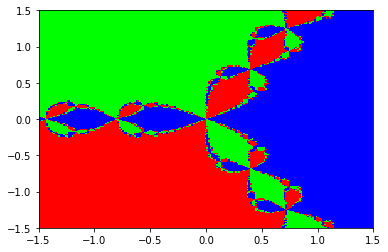

In [377]:
X_real,X_imag,Y=newton_complex(f, rootsf, Df, -1.5,1.5,-1.5,1.5,200,50)
plt.pcolormesh(X_real,X_imag,Y, cmap='brg')
plt.show()

In [380]:
g=lambda x: x**3-x
Dg=lambda x:3*x**2-1
rootsg=np.array([-1,0,1])

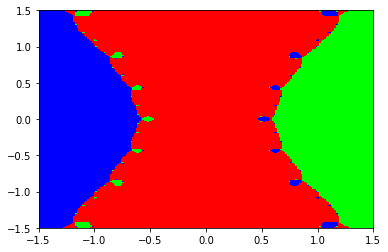

In [381]:
X,Y,Z=newton_complex(g,rootsg,Dg,-1.5,1.5,-1.5,1.5,200,50)
plt.pcolormesh(X,Y,Z,cmap='brg')
plt.show()